# Content

A loan application is used by borrowers to apply for a loan. Through the loan application, borrowers reveal key details about their finances to the lender. The loan application is crucial to determining whether the lender will grant the request for funds or credit.

![Loan](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/loan.png)

# Importing Labriries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data Train & Test


In [2]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv",index_col=False)
loan_data = loan_data.drop(['Unnamed: 0'], axis=1)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [4]:
loan_data.shape


(491, 13)

We have 491 rows and 13 columns in train dataset.

In [5]:
test_data.shape


(123, 12)

We have 123 rows and 12 columns in test dataset.

In [6]:
loan_data['Loan_Status'].value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [7]:
loan_data['Loan_Status'].value_counts(normalize=True)

1    0.698574
0    0.301426
Name: Loan_Status, dtype: float64

<Axes: >

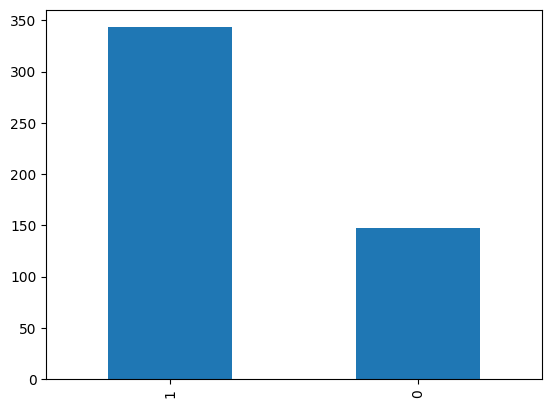

In [8]:
loan_data['Loan_Status'].value_counts().plot.bar()

The loan of 343(around 69.85%) people out of 491 were approved.

Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

* Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

## Independent Variable (Categorical)

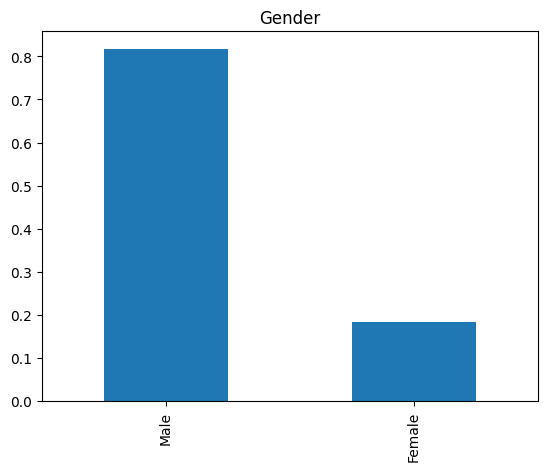

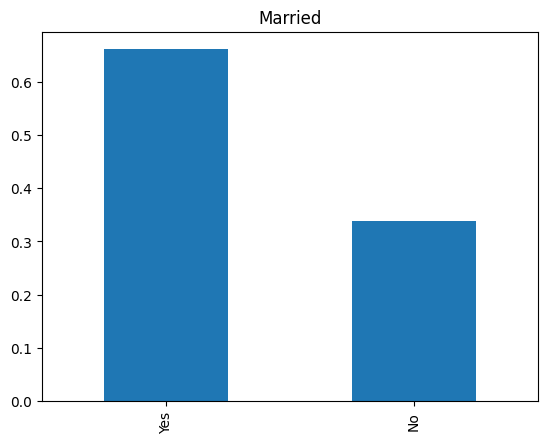

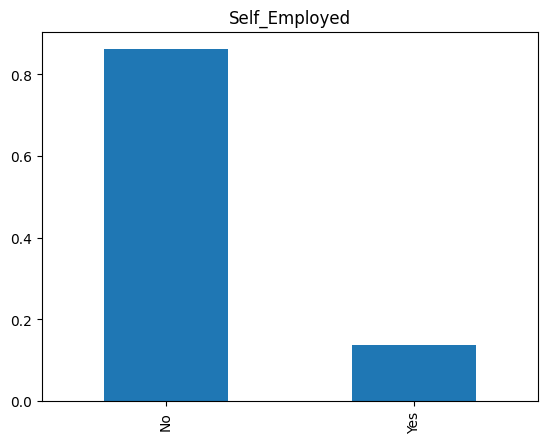

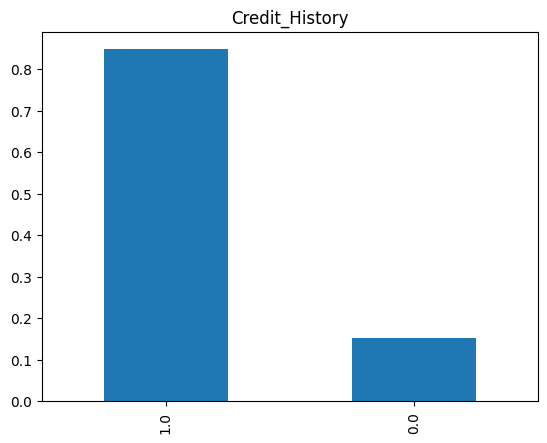

In [9]:
loan_data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
loan_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
loan_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
loan_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()


It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their doubts.

## Independent Variable (Ordinal)

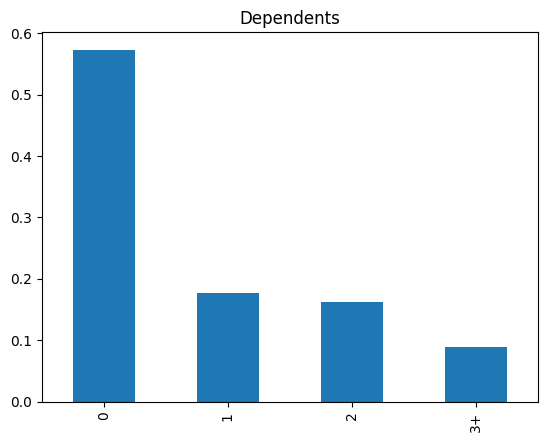

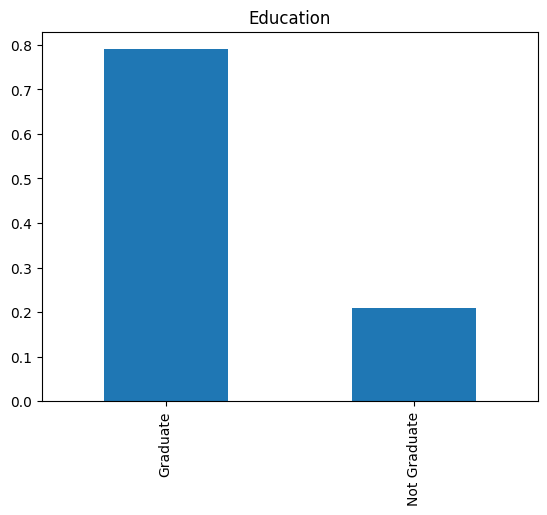

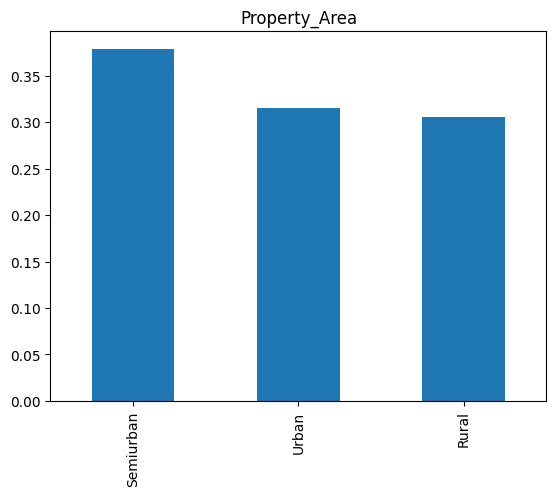

In [10]:
loan_data['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
loan_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
loan_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Following inferences can be made from the above bar plots:

* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

## Independent Variable (Numerical)

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

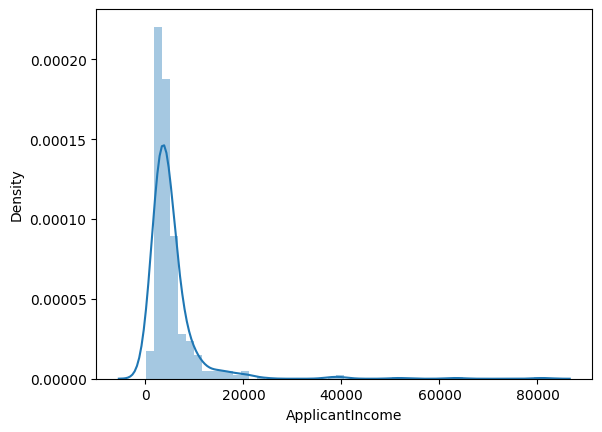

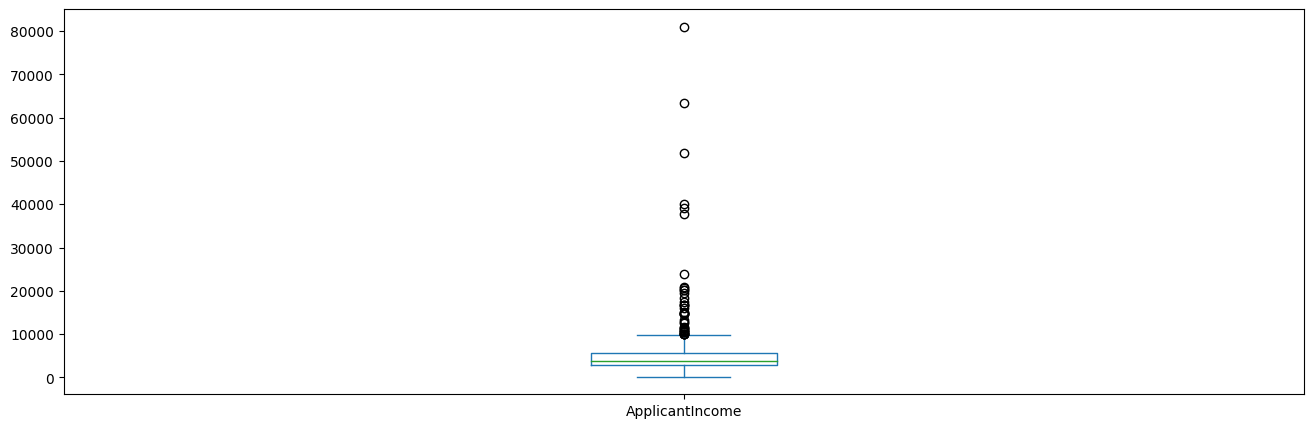

In [11]:
sns.distplot(loan_data['ApplicantIncome'])
plt.show()
loan_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different eduation levels. Let us segregate them by Education.

Text(0.5, 0.98, '')

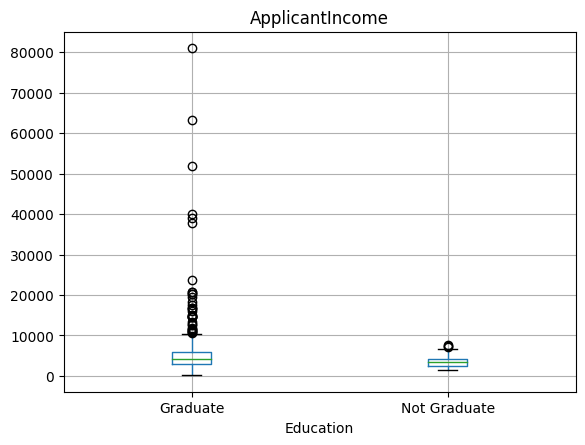

In [12]:
loan_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

Let's look at the Coapplicant income distribution.

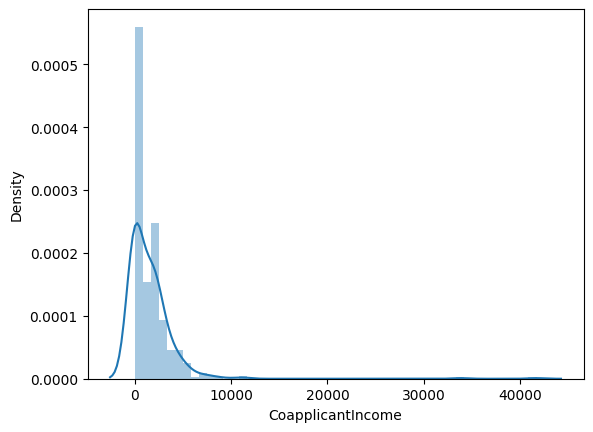

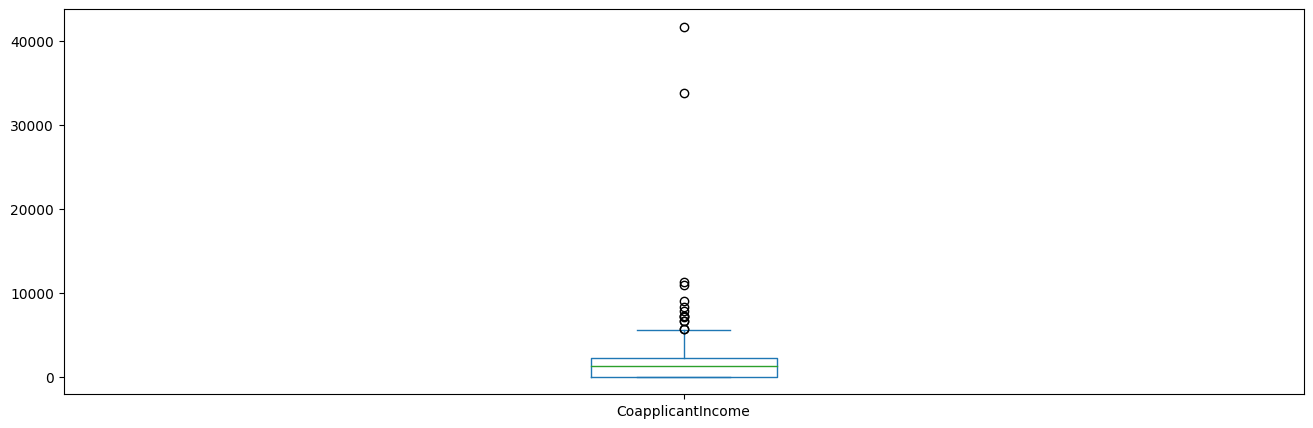

In [13]:
sns.distplot(loan_data['CoapplicantIncome'])
plt.show()
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()


We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

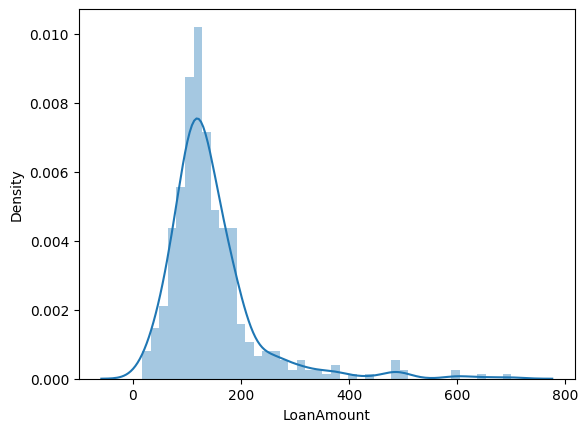

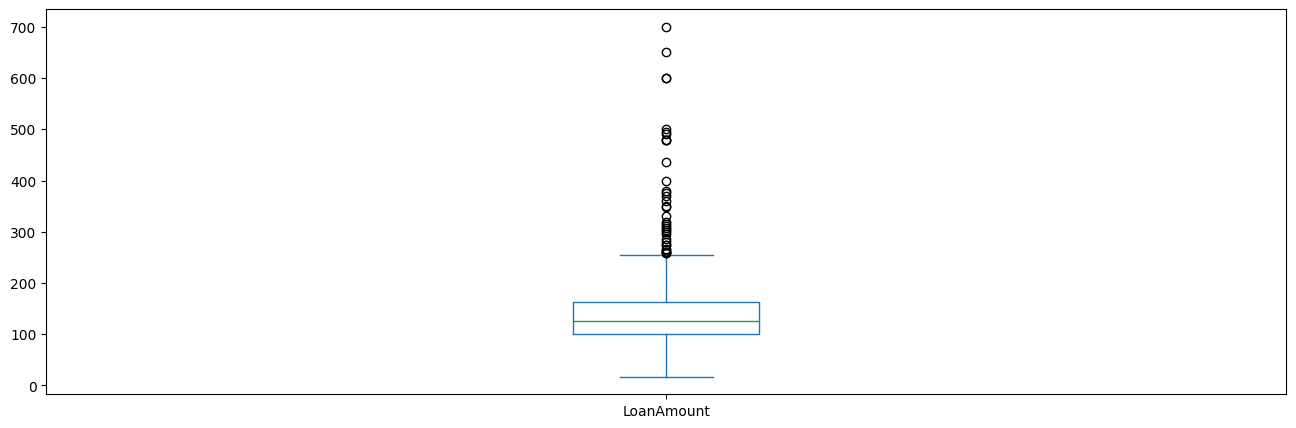

In [14]:
loan_data.notna()
# train.dropna()
# print(train[train['LoanAmount'].isnull()])
# train['LoanAmount'] = pd.to_numeric(train['LoanAmount'], errors='coerce')
# train = train.dropna(subset=['LoanAmount'])
# train['LoanAmount'] = train['LoanAmount'].astype(int)
sns.distplot(loan_data['LoanAmount'])
plt.show()
loan_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

## Bivariate Analysis
Let's recall some of the hypotheses that we generated earlier:

* Applicants with high incomes should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.
Let's try to test the above-mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variable vs Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

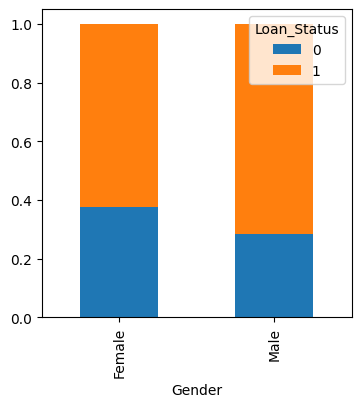

In [15]:
Gender=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

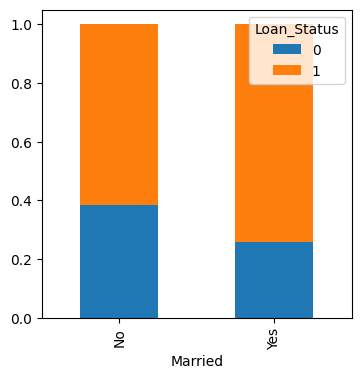

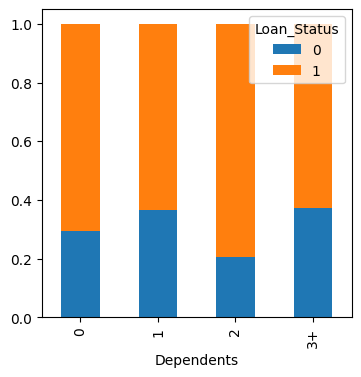

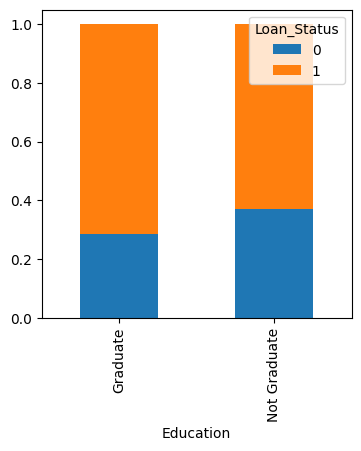

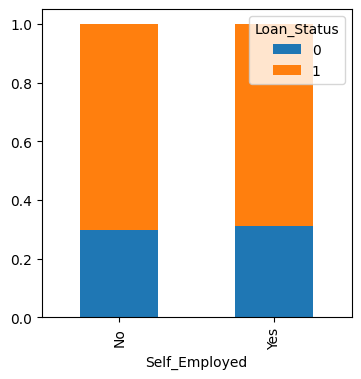

In [16]:
Married=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status'])
Education=pd.crosstab(loan_data['Education'],loan_data['Loan_Status'])
Self_Employed=pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

* The proportion of married appliants is higher for approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.


Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

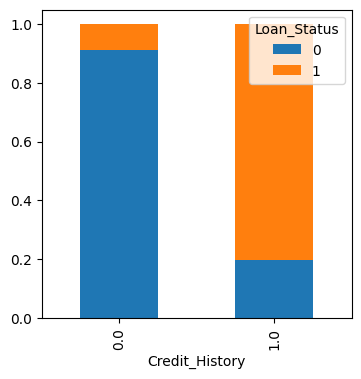

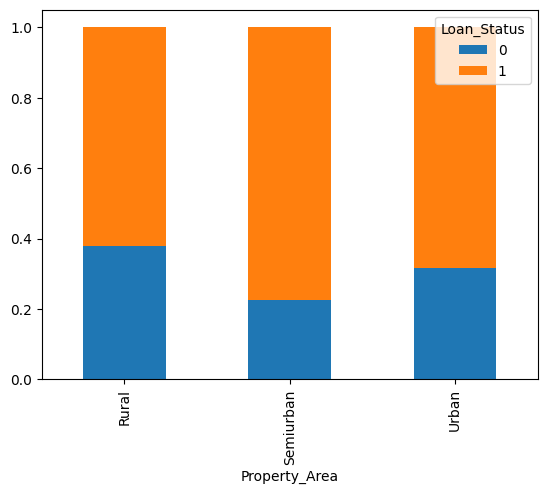

In [17]:
Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Property_Area=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

* It seems people with a credit history as 1 are more likely to get their loans approved.*
* The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

Now let's visualize numerical independent variables with respect to the target variable.

### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<Axes: xlabel='Loan_Status'>

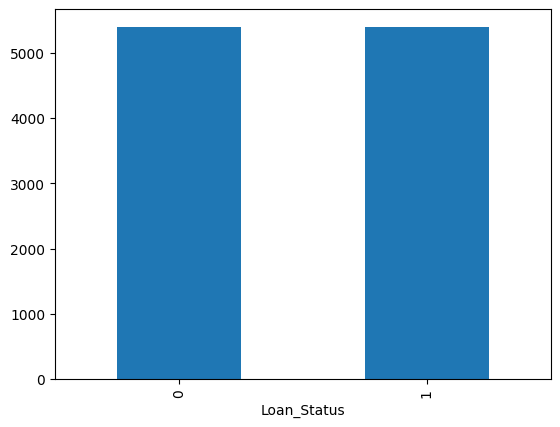

In [18]:
loan_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don't see any change in the mean income. So, let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

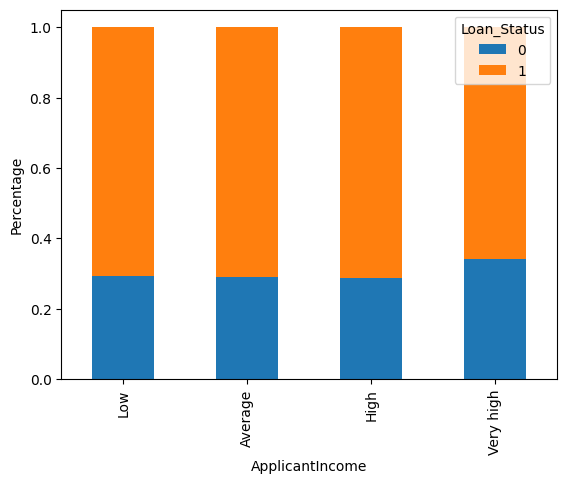

In [19]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Income_bin']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

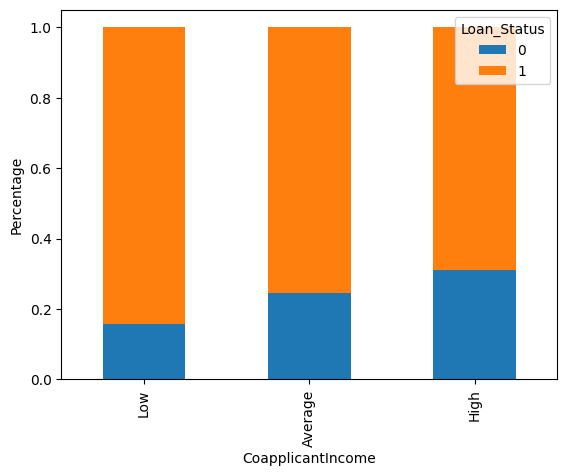

In [20]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_data['Coapplicant_Income_bin']=pd.cut(loan_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_data['Coapplicant_Income_bin'],loan_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant's and co-applicants income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

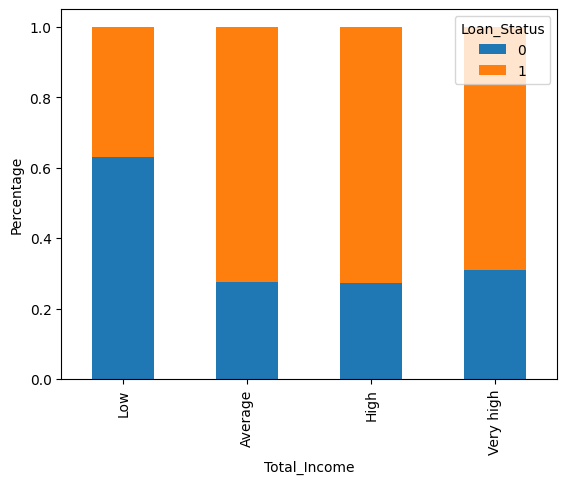

In [21]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Total_Income_bin']=pd.cut(loan_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_data['Total_Income_bin'],loan_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

Let's visualize the Loan Amount variable.

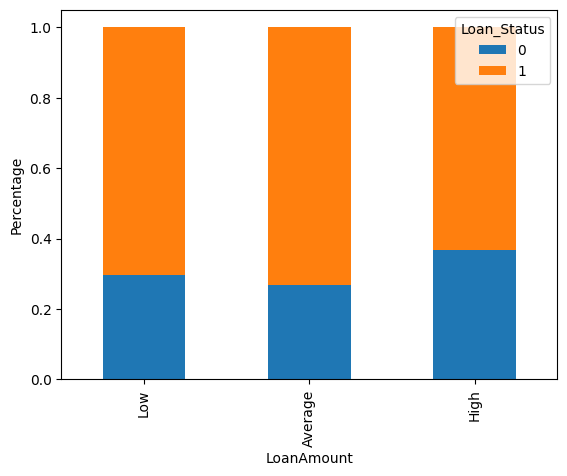

In [22]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_data['LoanAmount_bin']=pd.cut(loan_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(loan_data['LoanAmount_bin'],loan_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [23]:
# print(train.dtypes)
loan_data=loan_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
loan_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)


Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

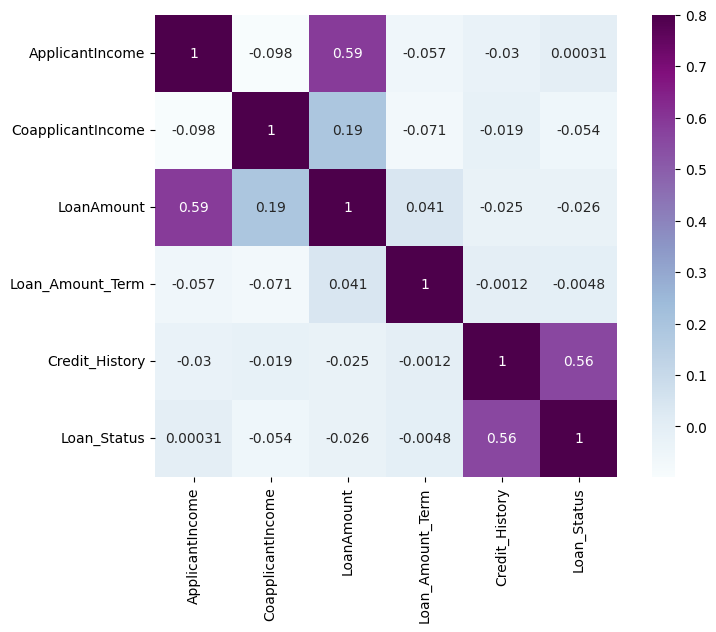

In [24]:
matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)


We see that the most correlate variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 

(LoanAmount is also correlated with CoapplicantIncome).

## Missing value imputation

Let's list out feature-wise count of missing values.

In [25]:
loan_data.isnull().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

  * For numerical variables: imputation using mean or median
  * For categorical variables: imputation using mode
  
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [26]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable

In [27]:
loan_data['Loan_Amount_Term'].value_counts()


360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [28]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [29]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [30]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [31]:
test_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

## Outlier Treatement

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

Let's examine what can happen to a data set with __outliers__. 

For the sample data set:

__1,1,2,2,2,2,3,3,3,4,4__

We find the following: mean, median, mode, and standard deviation

* Mean = 2.58
* Median = 2.5
* Mode=2
* Standard Deviation = 1.08

If we add an outlier to the data set:

__1,1,2,2,2,2,3,3,3,4,4,400__

The new values of our statistics are:

* Mean = 35.38
* Median = 2.5
* Mode=2
* Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. 

We must take steps to remove outliers from our data sets.


Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 

This is called __right skewness__. One way to remove the __skewness__ is by doing the __log transformation.__ 

As we take the __log transformation__, it does not affect the smaller values much, but reduces the larger values. So, we get a __distribution__ similar to __normal distribution__.


Let’s visualize the effect of __log transformation__. We will do the similar changes to the test file simultaneously.

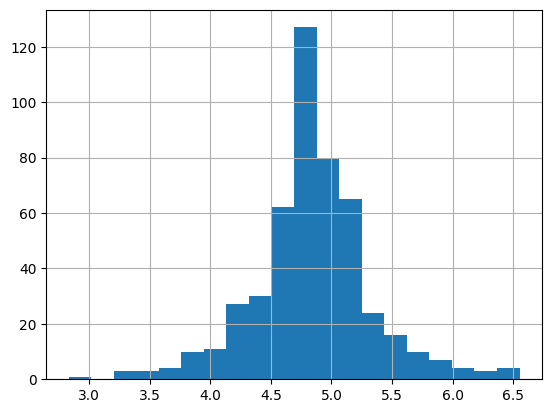

In [32]:
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

Let's build a logistic regression model and make predictions for the test dataset.


# Model Building : 

## __Part I__

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

To learn further on logistic regression, refer this article: https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/
Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [33]:
loan_data=loan_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most ef cient tool which contains many inbuilt functions that can be used for modeling in Python.

To learn further about sklearn, refer here: http://scikit-learn.org/stable/tutorial/index.html

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [34]:
X = loan_data.drop('Loan_Status',axis=1)
y = loan_data.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

* Consider the `Gender` variable. It has two classes, `Male and Female.`
* As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
* Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
* Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [35]:
train = loan_data.copy()
test = test_data.copy()

In [36]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
model = LogisticRegression()
model.fit(x_train, y_train)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12',random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression()

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [53]:
pred_cv = model.predict(x_valid)
print('Model Accuracy = ', accuracy_score(y_valid,pred_cv))
print('Model F1-Score = ', f1_score(y_valid,pred_cv))

Model Accuracy =  0.8040540540540541
Model F1-Score =  0.8711111111111112


In [46]:
type(pred_cv)

numpy.ndarray

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

Let’s make predictions for the test dataset.

In [40]:
pred_test = model.predict(test)

## __Prediction Test data & Downloading it to check the solver__

In [41]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred_test) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('datathon_loan_lr.csv', index=False)         
files.download('datathon_loan_lr.csv')

ModuleNotFoundError: No module named 'google.colab'

Got a score : __#9	`ayoubberd`	85.39325842696628__

## Logistic Regression using stratified k-folds cross validation

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

* The validation set approach
* k-fold cross validation
* Leave one out cross validation (LOOCV)
* Stratified k-fold cross validation


If you wish to know more about validation techniques, then please refer this article: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:

* Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
* For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
* It is generally a better approach when dealing with both bias and variance.
* A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.


Let’s import StratifiedKFold from sklearn and fit the model.

In [ ]:
from sklearn.model_selection import StratifiedKFold

Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset

In [ ]:
i=1
mean = 0
fmean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    f1score = f1_score(yvl,pred_test)
    mean += score
    fmean += f1score
    print('#######################')
    print ('accuracy_score',score)
    print('-------------------------')
    print ('F1 Score ',f1score)
    print('#######################')
    i+=1
    pred_test_f = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print('----------- Final Mean Score---------------')    
print('###########################################')
print ('\n Mean Validation Accuracy',mean/(i-1))
print ('\n Mean Validation F1 Score',fmean/(i-1))
print('###########################################')
print('-------------------------------------------')    



1 of kfold 5 
#######################
accuracy_score 0.8181818181818182
-------------------------
F1 Score  0.881578947368421
#######################

2 of kfold 5 
#######################
accuracy_score 0.7551020408163265
-------------------------
F1 Score  0.8356164383561644
#######################

3 of kfold 5 
#######################
accuracy_score 0.7551020408163265
-------------------------
F1 Score  0.8500000000000001
#######################

4 of kfold 5 
#######################
accuracy_score 0.8367346938775511
-------------------------
F1 Score  0.8840579710144928
#######################

5 of kfold 5 
#######################
accuracy_score 0.7959183673469388
-------------------------
F1 Score  0.8684210526315789
#######################
----------- Final Mean Score---------------
###########################################

 Mean Validation Accuracy 0.7922077922077921

 Mean Validation F1 Score 0.8639348818741315
###########################################
-----------------

* The mean validation accuracy for this model turns out to be __0.7922__ . 

* The mean validation f1 score for this model turns out to be __0.8639__ . 

Let us visualize the roc curve.

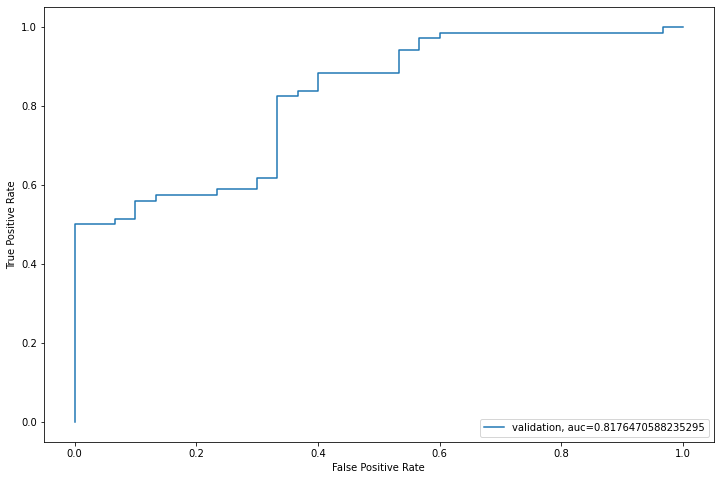

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

* We got an `auc` value of __0.8176__

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred_test_f) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('datathon_loan_lr_crosval.csv', index=False)         
files.download('datathon_loan_lr_crosval.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Got a score : __	`ayoubberd`	84.91620111731845__

## Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* __Total Income__ - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
* __EMI__ - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
* __Balance Income__ - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

Let’s check the distribution of Total Income.

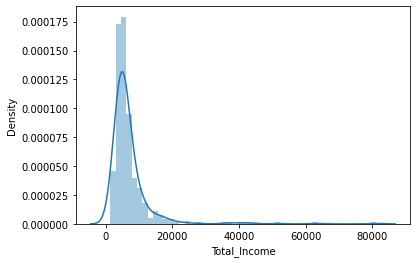

In [ ]:
sns.distplot(train['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

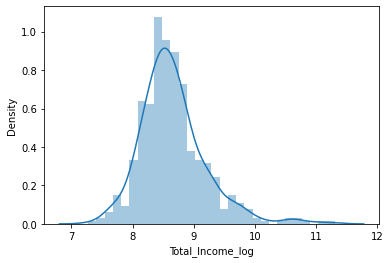

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let's create the EMI feature now.

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Let’s check the distribution of EMI variable.


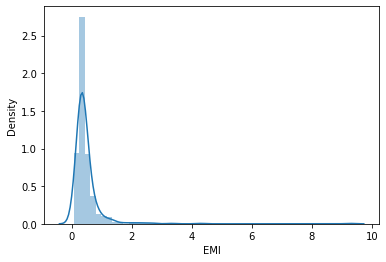

In [ ]:
sns.distplot(train['EMI'])

Let us create Balance Income feature now and check its distribution.

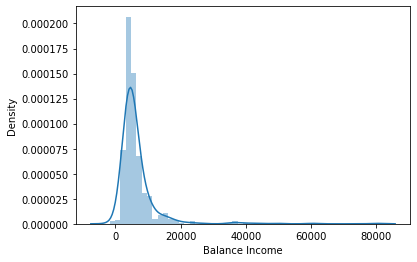

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

Let us now drop the variables which we used to create these new features.

 Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 

We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

## __Part II__

After creating new features, we can continue the model building process. 

So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost. 

We will build the following models in this section.

* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

Let’s prepare the data for feeding into the models.

In [ ]:
X = train.drop('Loan_Status', axis= 1)
y = train.Loan_Status

### __Logistic Regression__

In [ ]:
i=1
mean = 0
fmean = 0
print('----------- After Features Engineering---------------')    
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    f1score = f1_score(yvl,pred_test)
    mean += score
    fmean += f1score
    print('#######################')
    print ('accuracy_score',score)
    print('-------------------------')
    print ('F1 Score ',f1score)
    print('#######################')
    i+=1
    pred_test_fe = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


print('----------- Final Mean Score---------------')    
print('###########################################')
print ('\n Mean Validation Accuracy',mean/(i-1))
print ('\n Mean Validation F1 Score',fmean/(i-1))
print('###########################################')
print('-------------------------------------------')    


----------- After Features Engineering---------------

1 of kfold 5 
#######################
accuracy_score 0.797979797979798
-------------------------
F1 Score  0.8648648648648648
#######################

2 of kfold 5 
#######################
accuracy_score 0.7040816326530612
-------------------------
F1 Score  0.802721088435374
#######################

3 of kfold 5 
#######################
accuracy_score 0.7653061224489796
-------------------------
F1 Score  0.849673202614379
#######################

4 of kfold 5 
#######################
accuracy_score 0.826530612244898
-------------------------
F1 Score  0.881118881118881
#######################

5 of kfold 5 
#######################
accuracy_score 0.7959183673469388
-------------------------
F1 Score  0.8684210526315789
#######################
----------- Final Mean Score---------------
###########################################

 Mean Validation Accuracy 0.7779633065347351

 Mean Validation F1 Score 0.8533598179330155
###########

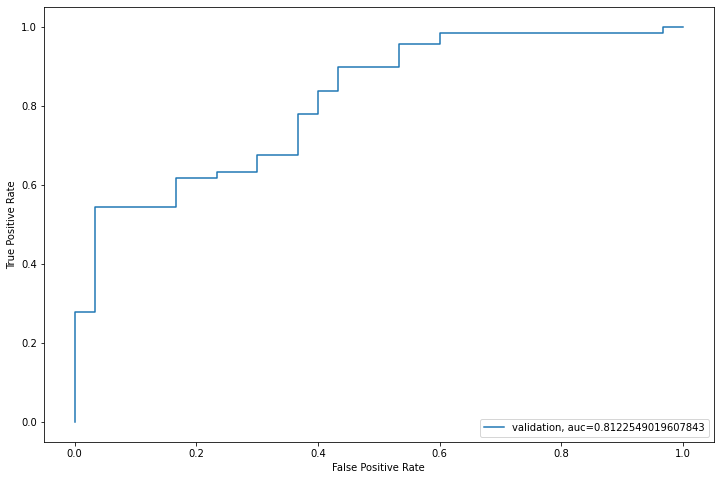

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred_test_fe) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('datathon_loan_lr_fe.csv', index=False)         
files.download('datathon_loan_lr_fe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Solver Got Score __#5	ayoubberd	86.1878453038674__   

Day : __23/12/2020 at 19:03__

### __Decision Tree__

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

For detailed explanation visit https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six

Let’s fit the decision tree model with 5 folds of cross validation.

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
i=1
mean = 0
fmean = 0
print('----------- After Features Engineering---------------')    
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model_tree = DecisionTreeClassifier(random_state=1)
    model_tree.fit(xtr,ytr)
    pred_test=model_tree.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    f1score = f1_score(yvl,pred_test)
    mean += score
    fmean += f1score
    print('#######################')
    print ('accuracy_score',score)
    print('-------------------------')
    print ('F1 Score ',f1score)
    print('#######################')
    i+=1
    pred_test_tree = model_tree.predict(test)
    pred = model_tree.predict_proba(xvl)[:,1]


print('----------- Final Mean Score---------------')    
print('###########################################')
print ('\n Mean Validation Accuracy',mean/(i-1))
print ('\n Mean Validation F1 Score',fmean/(i-1))
print('###########################################')
print('-------------------------------------------')    

----------- After Features Engineering---------------

1 of kfold 5 
#######################
accuracy_score 0.7575757575757576
-------------------------
F1 Score  0.8356164383561644
#######################

2 of kfold 5 
#######################
accuracy_score 0.673469387755102
-------------------------
F1 Score  0.7681159420289855
#######################

3 of kfold 5 
#######################
accuracy_score 0.673469387755102
-------------------------
F1 Score  0.7894736842105263
#######################

4 of kfold 5 
#######################
accuracy_score 0.7346938775510204
-------------------------
F1 Score  0.7999999999999999
#######################

5 of kfold 5 
#######################
accuracy_score 0.7448979591836735
-------------------------
F1 Score  0.8201438848920864
#######################
----------- Final Mean Score---------------
###########################################

 Mean Validation Accuracy 0.7168212739641311

 Mean Validation F1 Score 0.8026699898975526
########

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred_test_tree) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('datathon_loan_tree_fe.csv', index=False)         
files.download('datathon_loan_tree_fe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>